In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

database = 'database.sqlite'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
countries = pd.read_sql("""SELECT *
                             FROM Country;""",conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
leagues = pd.read_sql('''SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;''',conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [5]:
teams = pd.read_sql('''SELECT *
                        FROM Team;''',conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [6]:
team_names = pd.read_sql('''SELECT*
                            FROM Team
                            ORDER BY team_long_name
                            LIMIT 20;''',conn)
team_names

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA
5,11074,108893,111989.0,AC Arles-Avignon,ARL
6,49116,6493,1714.0,AC Bellinzona,BEL
7,26560,10217,650.0,ADO Den Haag,HAA
8,9537,8583,57.0,AJ Auxerre,AUX
9,9547,9829,69.0,AS Monaco,MON


In [18]:
match = pd.read_sql('''PRAGMA table_info('Match');''',conn)
print(match.iloc[:25,:])
print(match.iloc[25:50,:])
print(match.iloc[50:75,:])
print(match.iloc[75:100,:])
print(match.iloc[100:116,:])

    cid              name     type  notnull dflt_value  pk
0     0                id  INTEGER        0       None   1
1     1        country_id  INTEGER        0       None   0
2     2         league_id  INTEGER        0       None   0
3     3            season     TEXT        0       None   0
4     4             stage  INTEGER        0       None   0
5     5              date     TEXT        0       None   0
6     6      match_api_id  INTEGER        0       None   0
7     7  home_team_api_id  INTEGER        0       None   0
8     8  away_team_api_id  INTEGER        0       None   0
9     9    home_team_goal  INTEGER        0       None   0
10   10    away_team_goal  INTEGER        0       None   0
11   11    home_player_X1  INTEGER        0       None   0
12   12    home_player_X2  INTEGER        0       None   0
13   13    home_player_X3  INTEGER        0       None   0
14   14    home_player_X4  INTEGER        0       None   0
15   15    home_player_X5  INTEGER        0       None  

In [20]:
detailed_matches = pd.read_sql('''SELECT Match.id,
                                Country.name AS country_name,
                                League.name AS league_name,
                                season,
                                stage,
                                date,
                                HT.team_long_name AS home_team,
                                AT.team_long_name AS away_team,
                                home_team_goal,
                                away_team_goal
                                FROM Match
                                JOIN Country ON Country.id=Match.country_id
                                JOIN League ON League.id = Match.league_id
                                LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                               ORDER BY date
                               LIMIT 20;''',conn)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [21]:
leages_by_season = pd.read_sql('''SELECT Country.name AS country_name,
                                    league.name AS league_name,
                                    season,
                                    COUNT(DISTINCT stage) AS number_of_stages,
                                    COUNT(DISTINCT HT.team_long_name) AS number_of_teams,
                                    AVG(home_team_goal) AS avg_home_team_scores,
                                    AVG(away_team_goal) AS avg_away_team_scores,
                                    AVG(home_team_goal-away_team_goal) AS avg_avg_goal_dif,
                                    AVG(home_team_goal+away_team_goal) AS avg_goals,
                                    SUM(home_team_goal+away_team_goal) AS total_goals
                                    FROM Match
                                    JOIN Country ON Country.id = Match.country_id
                                    JOIN League ON League.id = Match.league_id
                                    LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id
                                    LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id
                                    WHERE country_name IN ('Spain', 'Germany','France','Italy','England')
                                    GROUP BY Country.name, League.name, season
                                    HAVING COUNT(DISTINCT stage)>10
                                    ORDER BY Country.name, League.name, season DESC;''',conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scores,avg_away_team_scores,avg_avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


<Axes: title={'center': 'Average goals per game over time'}>

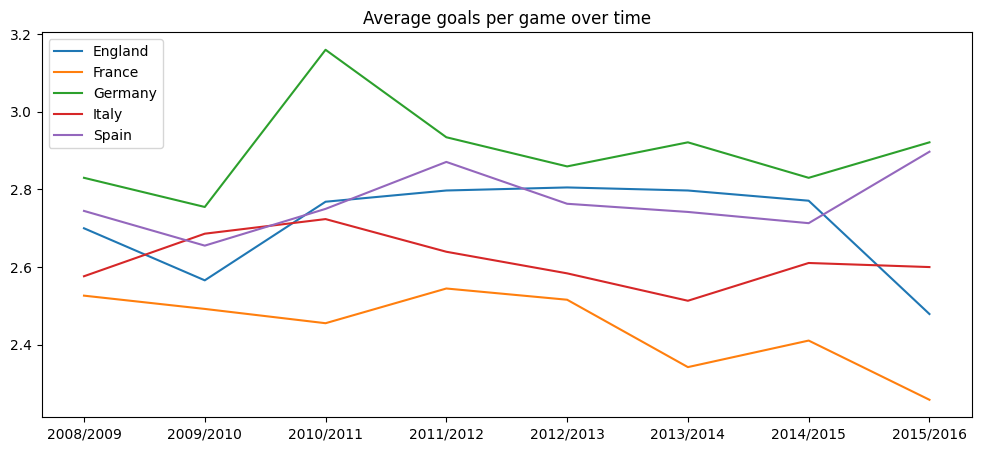

In [22]:
df = pd.DataFrame(index = np.sort(leages_by_season['season'].unique()),
                 columns= leages_by_season['country_name'].unique())
df.loc[:,'Germany']= list(leages_by_season.loc[leages_by_season['country_name']== 'Germany','avg_goals'])
df.loc[:,'Spain']= list(leages_by_season.loc[leages_by_season['country_name']== 'Spain','avg_goals'])
df.loc[:,'France']= list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']= list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']= list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average goals per game over time')

<Axes: title={'center': 'Average goals difference home vs out'}>

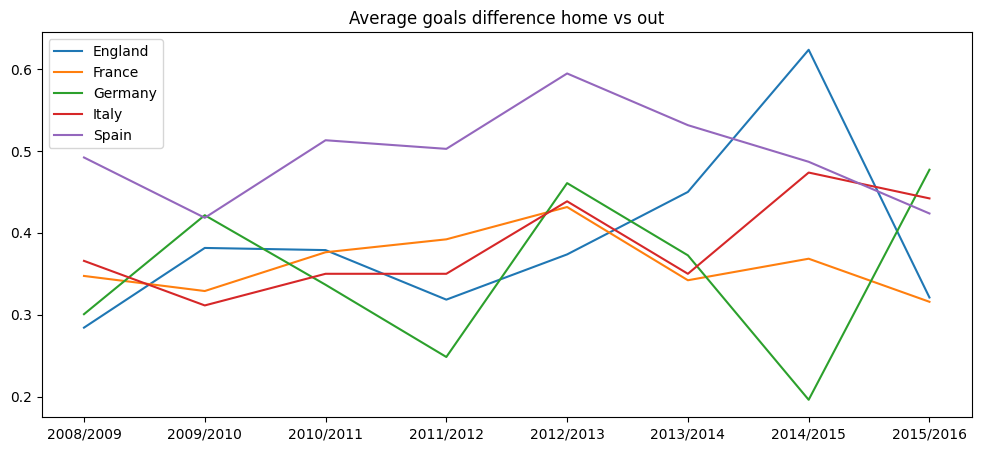

In [24]:
df = pd.DataFrame(index = np.sort(leages_by_season['season'].unique()),
                 columns= leages_by_season['country_name'].unique())
df.loc[:,'Germany']= list(leages_by_season.loc[leages_by_season['country_name']== 'Germany','avg_avg_goal_dif'])
df.loc[:,'Spain']= list(leages_by_season.loc[leages_by_season['country_name']== 'Spain','avg_avg_goal_dif'])
df.loc[:,'France']= list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_avg_goal_dif'])
df.loc[:,'Italy']= list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_avg_goal_dif'])
df.loc[:,'England']= list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_avg_goal_dif'])

df.plot(figsize=(12,5),title='Average goals difference home vs out')

In [25]:
players_height = pd.read_sql('''SELECT CASE
                                WHEN ROUND(height)<165 then 165
                                WHEN ROUND(height)>195 then 195
                                ELSE ROUND(height) END AS calc_height,
                                COUNT(height) AS distribution,
                                (AVG(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                (AVG(PA_Grouped.avg_potential)) AS avg_potential,
                                AVG(weight) AS avg_weight
                                FROM PLAYER
                                LEFT JOIN (SELECT Player_Attributes.player_api_id,
                                AVG(Player_Attributes.overall_rating) AS avg_overall_rating,
                                AVG(Player_Attributes.potential) AS avg_potential
                                FROM Player_Attributes
                                GROUP BY Player_Attributes.player_api_id) AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                                GROUP BY calc_height
                                ORDER BY calc_height;''',conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


<Axes: title={'center': 'Potential vs Height'}, xlabel='calc_height'>

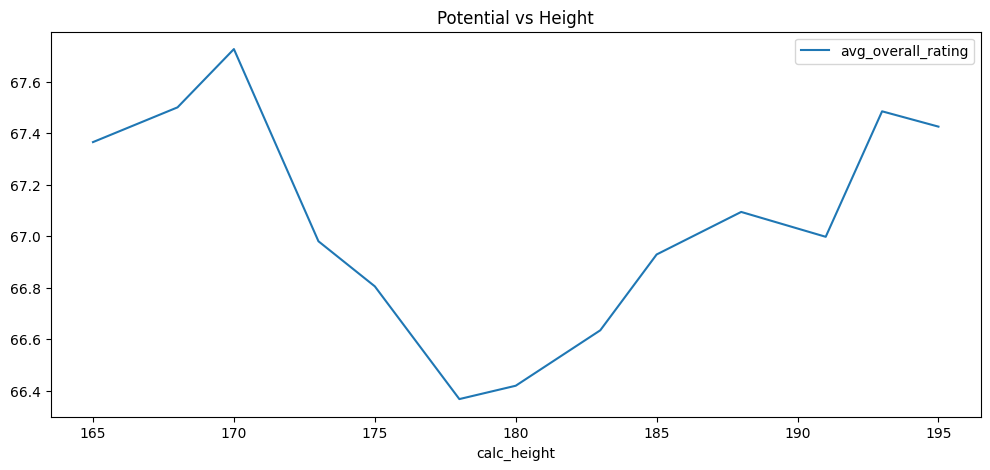

In [33]:
players_height.plot(x='calc_height', y='avg_overall_rating', figsize=(12, 5), title='Potential vs Height')
